# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
import Python_Code.Scripts as sc
import Python_Code.Reference as ref

In [2]:
pip install pyreadstat

Note: you may need to restart the kernel to use updated packages.


***First glance....***
These datasets contains information about each household that received SNAP benefits in 2007 and 2017. Each household is representated by a record and goes on to record information about each member of the household. 

For purpose of the class, I broke the data down into two states of interest: New Mexico and Nebraska. This is due to a previous geographical analysis of emerging hot and cold spots targeting San Juan County, New Mexico as a new hot spot and Cherry County, Nebraska as a new cold spot.





# **Data**

The data used in this notebook was obtained from the USDA website (https://www.fns.usda.gov/resource/snap-quality-control-data)

***2007 Data***

In [3]:
snap07 = pd.read_spss('qcfy2007_spss\qc_pub_fy2007.sav')

In [4]:
snap07.head(5)

,FSAFIL1,FSAFIL2,FSAFIL3,FSAFIL4,FSAFIL5,FSAFIL6,FSAFIL7,FSAFIL8,FSAFIL9,FSAFIL10,...,NDISCA7,NDISCA8,NDISCA9,NDISCA10,NDISCA11,NDISCA12,NDISCA13,NDISCA14,NDISCA15,NDISCA16
0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
snap07.shape

(47469, 769)

In [6]:
snap07.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47469 entries, 0 to 47468
Columns: 769 entries, FSAFIL1 to NDISCA16
dtypes: float64(769)
memory usage: 278.5 MB


In [7]:
snap07.isnull().sum()

FSAFIL1         0
FSAFIL2     20739
FSAFIL3     29470
FSAFIL4     36884
FSAFIL5     42301
            ...  
NDISCA12    47455
NDISCA13    47463
NDISCA14    47466
NDISCA15    47469
NDISCA16    47469
Length: 769, dtype: int64

***2017 Data***

In [8]:
snap17 = pd.read_spss('qcfy2017_spss_0\qc_pub_fy2017.sav')

In [9]:
snap17.head(5)

,FSAFIL1,FSAFIL2,FSAFIL3,FSAFIL4,FSAFIL5,FSAFIL6,FSAFIL7,FSAFIL8,FSAFIL9,FSAFIL10,...,WORK11,WORK12,WORK13,WORK14,WORK15,WORK16,FSNONCIT,FSDIS,FSELDER,FSKID
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0
1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0
4,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0


In [10]:
snap17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45530 entries, 0 to 45529
Columns: 811 entries, FSAFIL1 to FSKID
dtypes: float64(811)
memory usage: 281.7 MB


In [11]:
snap17.isnull().sum()

FSAFIL1         0
FSAFIL2     22368
FSAFIL3     30458
FSAFIL4     36350
FSAFIL5     40801
            ...  
WORK16      45530
FSNONCIT        0
FSDIS           0
FSELDER         0
FSKID           0
Length: 811, dtype: int64

# *Target Variable*

In [12]:
# 2007: 1 = Eligible, 2 = Not eligible
snap07['CAT_ELIG'].value_counts()

2.0    25134
1.0    22335
Name: CAT_ELIG, dtype: int64

In [13]:
# 2017: 0 = Not eligible, 1 = Reported eligible, 2= Recorded eligible
snap17['CAT_ELIG'].value_counts()

1.0    36223
0.0     7012
2.0     2295
Name: CAT_ELIG, dtype: int64

***Observations:***
*Changed target variable in 2007 and 2017 dataset to:*
- 0 = Not Eligible
- 1 = Eligible

In [14]:
snap07['CAT_ELIG'] = snap07['CAT_ELIG'].replace(2,0)
snap17['CAT_ELIG'] = snap17['CAT_ELIG'].replace(2,1)

In [15]:
snap07['CAT_ELIG'].value_counts()

0.0    25134
1.0    22335
Name: CAT_ELIG, dtype: int64

In [16]:
snap17['CAT_ELIG'].value_counts()

1.0    38518
0.0     7012
Name: CAT_ELIG, dtype: int64

In [17]:
print(f'2017 dataset: {snap17.shape} VS 2007 dataset: {snap07.shape}')

2017 dataset: (45530, 811) VS 2007 dataset: (47469, 769)


***Observations:*** Observations: Less people nationally applied for SNAP benefits in 2017 as opposed to 2007. This probably had to do with stronger national economic factors such as employment opportunities. Also, 45 columns of features were added to the dataset.

# Extracting State Data

***New Mexico***

In [18]:
#save New Mexico records
nm07 = snap07.loc[snap07['STATE'] == 35].astype('float64')
nm07_target = nm07['CAT_ELIG']
nm07.to_csv('./data/nm07.csv',index=None)

In [19]:
nm17 = snap17.loc[snap17['STATE'] == 35].astype('float64')
nm17_target = nm17['CAT_ELIG']
nm17.to_csv('./data/nm17.csv',index=None)

In [20]:
#New Mexico dataframe
df_nm07 = pd.read_csv('./data/nm07.csv')
df_nm07

,FSAFIL1,FSAFIL2,FSAFIL3,FSAFIL4,FSAFIL5,FSAFIL6,FSAFIL7,FSAFIL8,FSAFIL9,FSAFIL10,...,NDISCA7,NDISCA8,NDISCA9,NDISCA10,NDISCA11,NDISCA12,NDISCA13,NDISCA14,NDISCA15,NDISCA16
0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1251,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1252,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1253,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df_nm07['CAT_ELIG'].value_counts()

0.0    813
1.0    442
Name: CAT_ELIG, dtype: int64

In [22]:
df_nm17 = pd.read_csv('./data/nm17.csv')
df_nm17

,FSAFIL1,FSAFIL2,FSAFIL3,FSAFIL4,FSAFIL5,FSAFIL6,FSAFIL7,FSAFIL8,FSAFIL9,FSAFIL10,...,WORK11,WORK12,WORK13,WORK14,WORK15,WORK16,FSNONCIT,FSDIS,FSELDER,FSKID
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
1,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0
2,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0
3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
4,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0
960,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
961,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0
962,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,0.0


In [23]:
df_nm07['CAT_ELIG'].value_counts()

0.0    813
1.0    442
Name: CAT_ELIG, dtype: int64

In [24]:
df_nm17['CAT_ELIG'].value_counts()

1.0    964
Name: CAT_ELIG, dtype: int64

***Nebraska***

In [25]:
# Save Nebrasks records
ne07 = snap07.loc[snap07['STATE'] == 31].astype('float64')
ne07_target = ne07['CAT_ELIG']
ne07.to_csv('./data/ne07.csv',index=None)

In [26]:
ne17 = snap17.loc[snap17['STATE'] == 31].astype('float64')
ne17_target = ne17['CAT_ELIG']
ne17.to_csv('./data/ne17.csv',index=None)

In [27]:
#Nebraska dataframe
df_ne07 = pd.read_csv('./data/ne07.csv')
df_ne07

,FSAFIL1,FSAFIL2,FSAFIL3,FSAFIL4,FSAFIL5,FSAFIL6,FSAFIL7,FSAFIL8,FSAFIL9,FSAFIL10,...,NDISCA7,NDISCA8,NDISCA9,NDISCA10,NDISCA11,NDISCA12,NDISCA13,NDISCA14,NDISCA15,NDISCA16
0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
787,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
788,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
789,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df_ne17 = pd.read_csv('./data/ne17.csv')
df_ne17

,FSAFIL1,FSAFIL2,FSAFIL3,FSAFIL4,FSAFIL5,FSAFIL6,FSAFIL7,FSAFIL8,FSAFIL9,FSAFIL10,...,WORK11,WORK12,WORK13,WORK14,WORK15,WORK16,FSNONCIT,FSDIS,FSELDER,FSKID
0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
1,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0
3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0
4,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
890,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
891,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0
892,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0


In [29]:
df_ne07['CAT_ELIG'].value_counts()

0.0    505
1.0    286
Name: CAT_ELIG, dtype: int64

In [30]:
df_ne17['CAT_ELIG'].value_counts()

1.0    894
Name: CAT_ELIG, dtype: int64

***Observations:***  There are 1255 people who applied for SNAP in New Mexico, opposed to 791 applications in Nebraska in 2007.

There were significantly more people in both states (Nebraska: 894, New Mexico: 964) on SNAP in 2017. Due to a dramatic change, I suspect that it was due to more being eligible because of a change in qualifications.

**NULL VALUES**

***New Mexico***

In [31]:
with pd.option_context('display.max_rows', None):
    print(df_nm07.isnull().sum().sort_values(ascending=False)[:96])

NDISCA16    1255
CTZN15      1255
E_FINDG9    1255
E_FINDG8    1255
E_FINDG7    1255
E_FINDG6    1255
YRSED16     1255
YRSED15     1255
YRSED14     1255
YRSED13     1255
TIMEPER9    1255
TIMEPER8    1255
TIMEPER7    1255
TIMEPER6    1255
CTZN16      1255
CTZN14      1255
SEX15       1255
CTZN13      1255
OCCDATE9    1255
OCCDATE8    1255
OCCDATE7    1255
OCCDATE6    1255
RACETH16    1255
RACETH15    1255
RACETH14    1255
RACETH13    1255
ELEMENT6    1255
ELEMENT7    1255
ELEMENT8    1255
ELEMENT9    1255
EMPRG13     1255
EMPRG14     1255
EMPRG15     1255
EMPRG16     1255
FSUN15      1255
FSUN14      1255
FSUN13      1255
DIS13       1255
DIS14       1255
DIS15       1255
DIS16       1255
DPCOST16    1255
DPCOST15    1255
DPCOST14    1255
DPCOST13    1255
EMPSTB16    1255
EMPSTB15    1255
EMPSTB14    1255
EMPSTB13    1255
ABWDST16    1255
ABWDST15    1255
ABWDST14    1255
ABWDST13    1255
EMPSTA16    1255
EMPSTA15    1255
EMPSTA14    1255
EMPSTA13    1255
WRKREG16    1255
WRKREG15    12

In [32]:
#Remove those columns.
first_cut = df_nm07.isnull().sum().sort_values(ascending=False)[:96]
first_cut_df = pd.DataFrame([first_cut])
first_cut_df.T
fc_list = list(first_cut_df.columns)

#remove them
nm07 = df_nm07.drop(fc_list,axis=1)
nm07

,FSAFIL1,FSAFIL2,FSAFIL3,FSAFIL4,FSAFIL5,FSAFIL6,FSAFIL7,FSAFIL8,FSAFIL9,FSAFIL10,...,NDISCA3,NDISCA4,NDISCA5,NDISCA6,NDISCA7,NDISCA8,NDISCA9,NDISCA10,NDISCA11,NDISCA12
0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1251,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1252,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1253,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
with pd.option_context('display.max_rows', None):
    print(df_nm17.isnull().sum().sort_values(ascending=False)[:165])

DIS10       964
EMPSTA12    964
EMPSTA14    964
EMPSTA15    964
EMPSTA16    964
ELEMENT6    964
ELEMENT7    964
ELEMENT8    964
ELEMENT9    964
EMPSTB10    964
EMPSTB11    964
EMPSTB12    964
EMPSTB13    964
EMPSTB14    964
EMPSTB15    964
EMPSTB16    964
WORK13      964
WORK12      964
WORK11      964
WORK10      964
NATURE5     964
NATURE6     964
NATURE7     964
EMPSTA13    964
EMPSTA11    964
NATURE9     964
EMPSTA10    964
YRSED12     964
YRSED13     964
YRSED14     964
YRSED15     964
YRSED16     964
WORK14      964
VERIF7      964
DIS11       964
DIS12       964
EMPRG10     964
EMPRG11     964
EMPRG12     964
EMPRG13     964
EMPRG14     964
EMPRG15     964
EMPRG16     964
DIS13       964
DIS14       964
DIS15       964
DIS16       964
ELEMENT5    964
NATURE8     964
AGENCY4     964
YRSED10     964
E_FINDG8    964
E_FINDG6    964
DISCOV8     964
E_FINDG5    964
E_FINDG4    964
DISCOV9     964
TIMEPER9    964
TIMEPER8    964
TIMEPER7    964
TIMEPER6    964
TIMEPER5    964
TIMEPER4

In [34]:
#Remove those columns.
first_cut = df_nm17.isnull().sum().sort_values(ascending=False)[:165]
first_cut_df = pd.DataFrame([first_cut])
first_cut_df.T
fc_list = list(first_cut_df.columns)

#remove them
nm17 = df_nm17.drop(fc_list,axis=1)
nm17

,FSAFIL1,FSAFIL2,FSAFIL3,FSAFIL4,FSAFIL5,FSAFIL6,FSAFIL7,FSAFIL8,FSAFIL9,REL1,...,WORK4,WORK5,WORK6,WORK7,WORK8,WORK9,FSNONCIT,FSDIS,FSELDER,FSKID
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
1,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0
2,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0
3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
4,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0
960,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
961,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1.0,...,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0
962,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,0.0


***Nebraska***

In [35]:
with pd.option_context('display.max_rows', None):
    print(df_ne07.isnull().sum().sort_values(ascending=False)[:144])

NDISCA16    791
TIMEPER9    791
EMPRG11     791
EMPRG12     791
EMPRG13     791
EMPRG14     791
EMPRG15     791
EMPRG16     791
E_FINDG6    791
E_FINDG7    791
E_FINDG8    791
E_FINDG9    791
EMPSTA10    791
EMPSTA11    791
EMPSTA12    791
EMPSTA13    791
EMPSTA14    791
EMPSTA15    791
EMPSTA16    791
EMPRG10     791
TIMEPER8    791
CTZN10      791
TIMEPER7    791
CTZN12      791
CTZN13      791
CTZN14      791
CTZN15      791
OCCDATE6    791
OCCDATE7    791
OCCDATE8    791
OCCDATE9    791
YRSED10     791
YRSED11     791
YRSED12     791
YRSED13     791
YRSED14     791
YRSED15     791
YRSED16     791
NDISCA10    791
TIMEPER6    791
WRKREG10    791
WRKREG11    791
WRKREG12    791
WRKREG13    791
DIS14       791
DIS13       791
DIS12       791
DIS11       791
DIS10       791
DPCOST11    791
DPCOST12    791
DPCOST13    791
DPCOST14    791
DPCOST15    791
DPCOST16    791
FSUN10      791
FSUN11      791
FSUN12      791
FSUN13      791
FSUN14      791
FSUN15      791
DIS15       791
DIS16   

In [36]:
#Remove those columns.
first_cut = df_ne07.isnull().sum().sort_values(ascending=False)[:144]
first_cut_df = pd.DataFrame([first_cut])
first_cut_df.T
fc_list = list(first_cut_df.columns)

#remove them
ne07 = df_ne07.drop(fc_list,axis=1)
ne07

,FSAFIL1,FSAFIL2,FSAFIL3,FSAFIL4,FSAFIL5,FSAFIL6,FSAFIL7,FSAFIL8,FSAFIL9,REL1,...,FSNDISCA,NDISCA1,NDISCA2,NDISCA3,NDISCA4,NDISCA5,NDISCA6,NDISCA7,NDISCA8,NDISCA9
0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,0.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0,...,0.0,2.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
787,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,0.0,2.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
788,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
789,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,0.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
with pd.option_context('display.max_rows', None):
    print(df_ne17.isnull().sum().sort_values(ascending=False)[:91])

FSUN15      894
DIS15       894
EMPSTB15    894
EMPSTB16    894
WORK16      894
SEX16       894
SEX15       894
SEX14       894
NATURE9     894
EMPRG16     894
WRKREG16    894
WRKREG15    894
WRKREG14    894
EMPRG15     894
YRSED14     894
YRSED15     894
YRSED16     894
WORK14      894
E_FINDG9    894
FSUN16      894
CTZN14      894
DIS14       894
DIS16       894
AGE15       894
ABWDST16    894
EMPSTA16    894
NATURE8     894
ELEMENT5    894
AGENCY5     894
AGENCY6     894
AGENCY7     894
AGENCY8     894
ABWDST14    894
ABWDST15    894
WORK15      894
RACETH16    894
RACETH15    894
RACETH14    894
AGENCY9     894
ELEMENT6    894
NATURE7     894
NATURE6     894
NATURE5     894
EMPSTB14    894
AGE16       894
AGE14       894
EMPSTA14    894
VERIF6      894
TIMEPER9    894
TIMEPER8    894
TIMEPER7    894
TIMEPER6    894
TIMEPER5    894
FSAFIL16    894
FSAFIL15    894
FSAFIL14    894
CTZN16      894
VERIF8      894
VERIF9      894
OCCDATE9    894
OCCDATE8    894
OCCDATE7    894
OCCDATE6

In [38]:
#Remove those columns.
first_cut = df_ne17.isnull().sum().sort_values(ascending=False)[:91]
first_cut_df = pd.DataFrame([first_cut])
first_cut_df.T
fc_list = list(first_cut_df.columns)

#remove them
ne17 = df_ne17.drop(fc_list,axis=1)
ne17

,FSAFIL1,FSAFIL2,FSAFIL3,FSAFIL4,FSAFIL5,FSAFIL6,FSAFIL7,FSAFIL8,FSAFIL9,FSAFIL10,...,WORK8,WORK9,WORK10,WORK11,WORK12,WORK13,FSNONCIT,FSDIS,FSELDER,FSKID
0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
1,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0
3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0
4,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
890,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
891,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0
892,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0


***Partially Missing: High Nullity***
According to *The Proportions of Missing data should not be used to guild decisions on multiple imputions* states that the value of data used to impute is more valuable rater than that of the missing data. 
In order to extract valuable data a 50% cutoff of missing rows will be used to ensure the impution method is more accurate. 

In [39]:
dict_df = {'nm07':nm07,'nm17':nm17,'ne07':ne07,'ne17':ne17}

In [40]:
for key, value in dict_df.items():
    print(f'50% mark for high nullitary columns:')
    print(f'{key}: {round(value.shape[0]/2)}')

50% mark for high nullitary columns:
nm07: 628
50% mark for high nullitary columns:
nm17: 482
50% mark for high nullitary columns:
ne07: 396
50% mark for high nullitary columns:
ne17: 447


In [41]:
all_df_att = pd.DataFrame(dict_df.keys(), columns = ['name'])
all_df_att['rows'] = [value.shape[0] for key,value in dict_df.items()]
all_df_att['threshold'] = [round(value.shape[0]/2) for key, value in dict_df.items()]
all_df_att['start_col'] = [value.shape[1] for key,value in dict_df.items()]
all_df_att

,name,rows,threshold,start_col
0,nm07,1255,628,673
1,nm17,964,482,646
2,ne07,791,396,625
3,ne17,894,447,720


In [42]:
#New Mexico 2007
null_counts = nm07.isnull().sum()
nulls = null_counts[null_counts>628]
sc_list = list(nulls.index)

#remove them
nm07 = nm07.drop(sc_list,axis=1)
all_df_att['end_col'] = nm07.shape[1]
all_df_att

,name,rows,threshold,start_col,end_col
0,nm07,1255,628,673,471
1,nm17,964,482,646,471
2,ne07,791,396,625,471
3,ne17,894,447,720,471


In [43]:
#New Mexico 2017
null_counts = nm17.isnull().sum()
nulls = null_counts[null_counts>482]
sc_list = list(nulls.index)

#remove them
nm17 = nm17.drop(sc_list,axis=1)
all_df_att.loc[all_df_att['name']=='nm17',['end_col']] = nm17.shape[1]
all_df_att

,name,rows,threshold,start_col,end_col
0,nm07,1255,628,673,471
1,nm17,964,482,646,495
2,ne07,791,396,625,471
3,ne17,894,447,720,471


In [44]:
#Nebraska 2007
null_counts = ne07.isnull().sum()
nulls = null_counts[null_counts>396]
sc_list = list(nulls.index)

#remove them
ne07 = ne07.drop(sc_list,axis=1)
all_df_att.loc[all_df_att['name']=='ne07',['end_col']] = ne07.shape[1]
all_df_att

,name,rows,threshold,start_col,end_col
0,nm07,1255,628,673,471
1,nm17,964,482,646,495
2,ne07,791,396,625,472
3,ne17,894,447,720,471


In [45]:
#Nebraska 2017
null_counts = ne17.isnull().sum()
nulls = null_counts[null_counts>447]
sc_list = list(nulls.index)

#remove them
ne17 = ne17.drop(sc_list,axis=1)
all_df_att.loc[all_df_att['name']=='ne17',['end_col']] = ne17.shape[1]
all_df_att

,name,rows,threshold,start_col,end_col
0,nm07,1255,628,673,471
1,nm17,964,482,646,495
2,ne07,791,396,625,472
3,ne17,894,447,720,495


***Imputing null values with mean***

scikitlearn imputer will be used to fill values for colums with null values by accessing a script from the Scripts.py file.

In [47]:
nm07 = sc.impute_df(nm07)
nm17 = sc.impute_df(nm17)
ne07 = sc.impute_df(ne07)
ne17 = sc.impute_df(ne17)

***Observations:*** There are still colums that have all zero's as their values,I will now drop those colums.

In [49]:
nm07 = only_zero(nm07)
nm17 = only_zero(nm17)
ne07 = only_zero(ne07)
ne17 = only_zero(ne17)

In [50]:
all_df_att['orig'] = 0
all_df_att['final_col']=0

all_df_att.loc[all_df_att['name']=='nm07',['orig']] = df_nm07.shape[1]
all_df_att.loc[all_df_att['name']=='nm17',['orig']] = df_nm17.shape[1]
all_df_att.loc[all_df_att['name']=='ne07',['orig']] = df_ne07.shape[1]
all_df_att.loc[all_df_att['name']=='ne17',['orig']] = df_ne17.shape[1]

all_df_att.loc[all_df_att['name']=='nm07',['final_col']] = nm07.shape[1]
all_df_att.loc[all_df_att['name']=='nm17',['final_col']] = nm17.shape[1]
all_df_att.loc[all_df_att['name']=='ne07',['final_col']] = ne07.shape[1]
all_df_att.loc[all_df_att['name']=='ne17',['final_col']] = ne17.shape[1]

In [51]:
all_df_att.set_index('name')

,rows,threshold,start_col,end_col,orig,final_col
name,,,,,,
nm07,1255,628,673,471,769,176
nm17,964,482,646,495,811,170
ne07,791,396,625,472,769,172
ne17,894,447,720,495,811,170


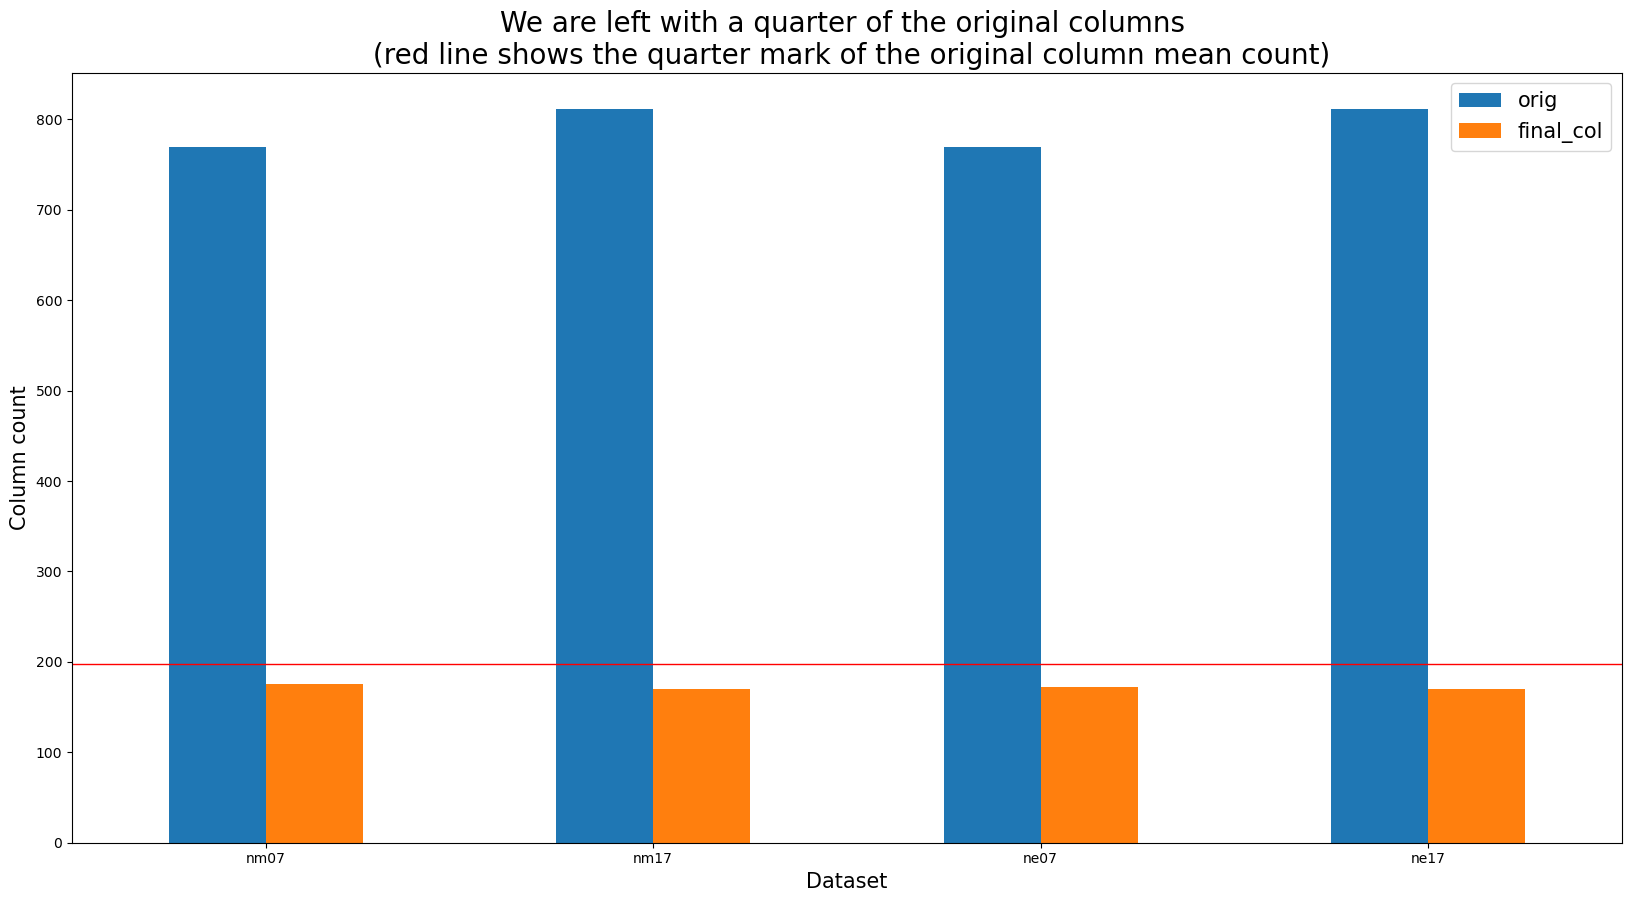

In [52]:
quarter = (all_df_att['orig'].mean())*.25

fig, ax = plt.subplots(figsize=(20,10))
all_df_att[['orig','final_col']].plot.bar(ax=ax)
plt.xlabel('Dataset',fontsize=15)
plt.ylabel('Column count',fontsize=15)
plt.xticks([0, 1, 2,3],labels=['nm07','nm17','ne07','ne17'],rotation=360)
plt.axhline(y=quarter,linewidth=1,color='r')
plt.legend(fontsize=15)
plt.title('We are left with a quarter of the original columns \n (red line shows the quarter mark of the original column mean count)',fontsize=20)
plt.savefig('./Images/final_null.png');

# ***Save Clean Files***

In [53]:
nm07_target.reset_index(drop=True,inplace=True)
nm07 = nm07.assign(CAT_ELIG=nm07_target)
nm07 = nm07.astype('float64')
nm07.to_csv('./data/clean_nm07.csv',index=None)

In [54]:
nm17_target.reset_index(drop=True,inplace=True)
nm17 = nm17.assign(CAT_ELIG=nm17_target)
nm17 = nm17.astype('float64')
nm17.to_csv('./data/clean_nm17.csv',index=None)

In [55]:
ne07_target.reset_index(drop=True,inplace=True)
ne07 = ne07.assign(CAT_ELIG=ne07_target)
ne07 = ne07.astype('float64')
ne07.to_csv('./data/clean_ne07.csv',index=None)

In [56]:
ne17_target.reset_index(drop=True,inplace=True)
ne17 = ne17.assign(CAT_ELIG=ne17_target)
ne17 = ne17.astype('float64')
ne17.to_csv('./data/clean_ne17.csv',index=None)